In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [3]:
train_data = datasets.FashionMNIST(root="data",
                                   train=True,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

test_data = datasets.FashionMNIST(root="data",
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

100%|██████████| 26421880/26421880 [00:01<00:00, 17242409.47it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 268852.79it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5068313.47it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20067171.93it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
train_data.targets.shape

torch.Size([60000])

In [10]:
print(f"Image Shape: {image.shape} -> [color channels, height, width]") # Our images are gray_scale!
print(f"Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Label: Ankle boot


(-0.5, 27.5, 27.5, -0.5)

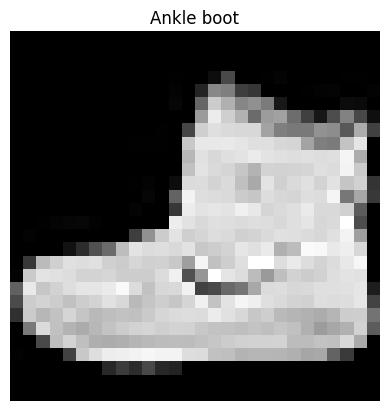

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

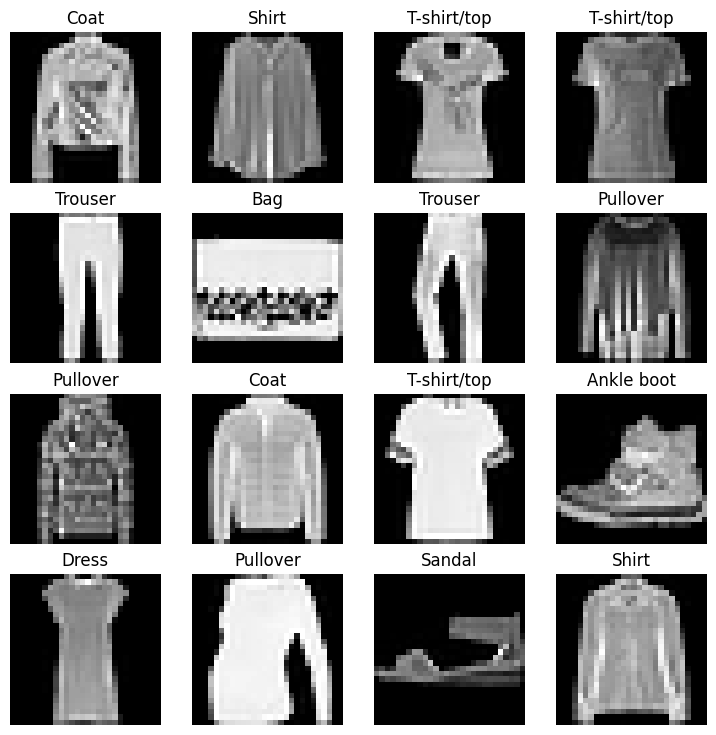

In [12]:
# Show more images

plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
  random_index = torch.randint(1, len(train_data), size=[1]).item()

  plt.subplot(rows, cols, i)

  image, label = train_data[random_index]

  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [13]:
# Now our data is in the form of PyTorch dataset, to transform it to mini-batches, we need a Data-Loader
# It also helps to iterate over batches!

from torch.utils.data import DataLoader

In [14]:
BATCH_SIZE = 32

train_data_loader = DataLoader(train_data, BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(test_data, BATCH_SIZE, shuffle=False)

In [15]:
train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7c90b8511ea0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c90b614e9e0>)

In [16]:
print(f"Length of Training Data loader: {len(train_data_loader)}, Batches of {train_data_loader.batch_size}")
print(f"Length of Testing Data loader: {len(test_data_loader)}, Batches of {test_data_loader.batch_size}")

Length of Training Data loader: 1875, Batches of 32
Length of Testing Data loader: 313, Batches of 32


In [17]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape # [Batch_Size, Color_Channels, Height, Width] Color Channels First!

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

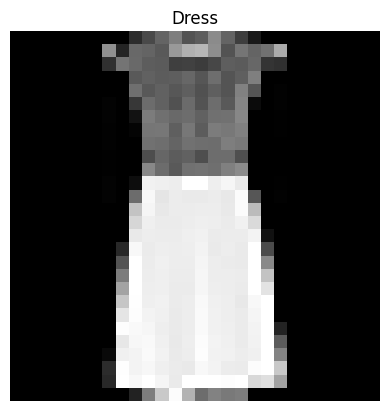

In [18]:
# Visualizing Images in the batch

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx].squeeze(), train_labels_batch[random_idx]
plt.imshow(img, cmap="gray")
plt.title(class_names[label])
plt.axis(False)

In [19]:
class FashionMNISTModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    # Creating the (Tiny VGG) Architecture
    self.conv_layer1 = nn.Sequential(nn.Conv2d(in_channels=input_shape,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2)
                                      )

    self.conv_layer2 = nn.Sequential(nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.Conv2d(in_channels=hidden_units,
                                                out_channels=hidden_units,
                                                kernel_size=3,
                                                stride=1,
                                                padding=1),
                                      nn.ReLU(),
                                      nn.MaxPool2d(kernel_size=2)
                                      )

    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features= hidden_units * 49,
                                              out_features=output_shape)
                                    )

  def forward(self, x):
    x = self.conv_layer1(x)
    # print(f"Shape after conv_layer1: {x.shape}")

    x = self.conv_layer2(x)
    # print(f"Shape after conv_layer2: {x.shape}")

    x = self.classifier(x)
    # print(f"Shape after classifing: {x.shape}")

    return x

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
model = FashionMNISTModel(input_shape=1, #The number of color channels
                          hidden_units=10,
                          output_shape=len(class_names)).to(device)

next(model.parameters()).device

device(type='cuda', index=0)

In [22]:
f = nn.Flatten(start_dim=0) # The default start dim is 1
x = f(torch.randn(10, 7, 7))

x.size()

torch.Size([490])

In [23]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
model(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0106,  0.0989, -0.0668, -0.0076, -0.0378,  0.0330,  0.0501,  0.0113,
          0.1038, -0.0079]], device='cuda:0', grad_fn=<AddmmBackward0>)

# Helper Functions

In [24]:
import requests
from pathlib import Path

if Path("HelperFunctions.py").is_file():
  print("Helper Functions already exists, skipping downloading")
else:
  print("downloading HelperFunctions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("HelperFunctions.py", "wb") as f:
    f.write(request.content)

downloading HelperFunctions.py


In [25]:
# Picking a loss function and an optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.005)

In [26]:
# from HelperFunctions import accuracy_fn

def accuracy_fn(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item()
  accuracy = correct / len(y_true) * 100

  return accuracy

# Timer Function

In [27]:
from timeit import default_timer as timer

def display_train_time(start: float,
                       end: float,
                       device: torch.device=None):
  total_time = end-start
  print(f"Train time on device {device}: {total_time:.3f} seconds")

  return total_time

In [28]:
start = timer()
end = timer()

display_train_time(start, end, device="cpu")

Train time on device cpu: 0.000 seconds


4.489999997758787e-05

# Functionizing the Training & Testing

In [29]:
def train_step(model: nn.Module,
               data_loader: torch.utils.data.dataloader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  training_loss = 0
  training_acc = 0

  model.train()

  for batch, (x, y) in enumerate(data_loader):

    # Put the data on the target device
    x, y = x.to(device), y.to(device)

    # Forward Pass
    y_pred = model(x)

    # Loss
    loss = loss_fn(y_pred, y)
    training_loss+=loss
    training_acc+=accuracy_fn(y_pred.argmax(dim=1), y)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss Backward
    loss.backward()

    # optimizer step step step
    optimizer.step()

  # After looping over batches, devide the training loss over the number of batches to get the averge loss per batch
  training_loss/=len(data_loader) # train.data_loader (returns the number of batches)
  training_acc/=len(data_loader)

  print(f"Training Loss: {training_loss:.5f} | Training Accuracy: {training_acc:.2f}%")

In [30]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.dataloader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):

  testing_acc = 0
  testing_loss = 0

  model.eval()
  with torch.inference_mode():
    for x, y in test_data_loader:

      x, y = x.to(device), y.to(device)

      # Forward Pass
      y_test_pred = model(x)

      # Loss
      testing_loss+=loss_fn(y_test_pred, y)

      # Accuracy
      testing_acc += accuracy_fn(y_test_pred.argmax(dim=1), y)

    testing_loss/=len(test_data_loader)
    testing_acc/=len(test_data_loader)

  print(f"Testing Loss: {testing_loss:.3f} | Testing Accuracy: {testing_acc:.2f}%")


In [31]:
# Import tqdm for progress bar (Wow!!!)
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_start_time_on_gpu = timer()

# Set the number of epochs
epochs = 10

# Training
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}.\n--------------------------------------")

  train_step(model, train_data_loader, loss_fn, optimizer, accuracy_fn, device)

  # Testing
  test_step(model, test_data_loader, loss_fn, accuracy_fn, device)

# Compute the time of the training
train_end_time_on_gpu = timer()

display_train_time(train_start_time_on_gpu, train_end_time_on_gpu, device=next(model.parameters()).device)


  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 0.
--------------------------------------
Training Loss: 0.43133 | Training Accuracy: 84.40%
Testing Loss: 0.345 | Testing Accuracy: 87.13%
epoch: 1.
--------------------------------------
Training Loss: 0.31946 | Training Accuracy: 88.46%
Testing Loss: 0.324 | Testing Accuracy: 88.35%
epoch: 2.
--------------------------------------
Training Loss: 0.29481 | Training Accuracy: 89.34%
Testing Loss: 0.308 | Testing Accuracy: 88.81%
epoch: 3.
--------------------------------------
Training Loss: 0.28343 | Training Accuracy: 89.59%
Testing Loss: 0.304 | Testing Accuracy: 89.36%
epoch: 4.
--------------------------------------
Training Loss: 0.27408 | Training Accuracy: 90.02%
Testing Loss: 0.302 | Testing Accuracy: 89.17%
epoch: 5.
--------------------------------------
Training Loss: 0.26941 | Training Accuracy: 90.18%
Testing Loss: 0.297 | Testing Accuracy: 89.21%
epoch: 6.
--------------------------------------
Training Loss: 0.26446 | Training Accuracy: 90.47%
Testing Loss: 0.29

130.01184109399998

In [32]:
torch.manual_seed(42)

def eval_model(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device = device):

  model.eval()

  loss, acc = 0, 0

  with torch.inference_mode():

    for x, y in tqdm(data_loader):

      x, y = x.to(device), y.to(device)

      # Forward Pass
      y_pred = model(x)

      # Loss
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(torch.argmax(y_pred, dim=1), y)

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"Model Name" : model.__class__.__name__,
          "Model Loss" : loss.item(),
          "Model Accuracy" : acc}

In [33]:
# Testing the model
model_results = eval_model(model, test_data_loader, loss_fn, accuracy_fn)
model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModel',
 'Model Loss': 0.2993398606777191,
 'Model Accuracy': 89.60662939297124}

In [34]:
!nvidia-smi

Tue Sep 26 16:00:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   1125MiB / 15360MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Evaluting the Model Visually

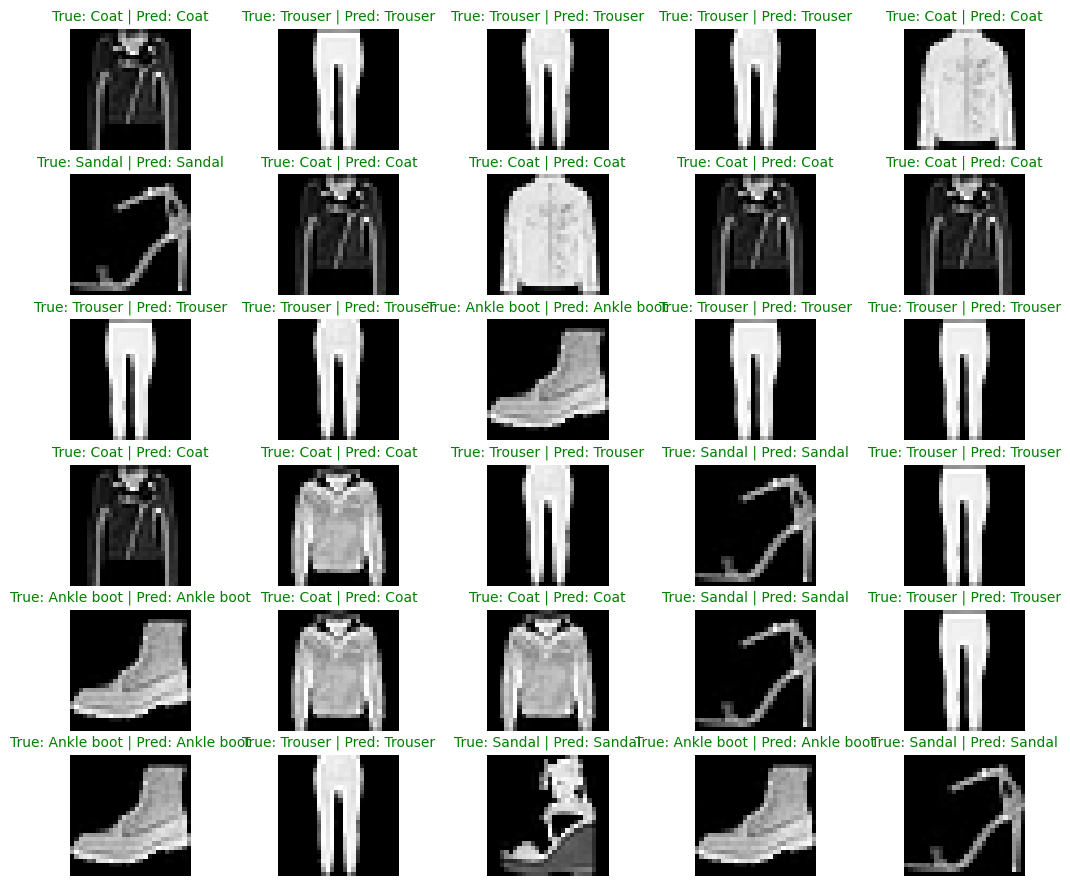

In [35]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

rows = 6
cols = 5

plt.figure(figsize=(13, 11))

model.eval()
with torch.inference_mode():

  for i in range(1, rows * cols + 1):
    plt.subplot(rows, cols, i)

    random_index = torch.randint(1, 9, size=[1]).item()
    image, label = test_samples[random_index], test_labels[random_index]

    pred_label = model(image.unsqueeze(dim=0).to(device)).argmax()

    plt.imshow(image.squeeze(), cmap="gray")

    if pred_label == label:
      plt.title(f"True: {class_names[label]} | Pred: {class_names[pred_label]}", c='g', fontsize=10)
    else:
      plt.title(f"True: {class_names[label]} | Pred: {class_names[pred_label]}", c='r', fontsize=10)

    plt.axis(False)

In [36]:
y_preds = []
model.eval()

with torch.inference_mode():
  for x, y in tqdm(test_data_loader, desc="Making Predictions..."):
    # Send the data to the target device
    x, y = x.to(device), y.to(device)

    # Forward Pass
    logits = model(x)

    # Pred probs then labels
    y_pred = torch.softmax(logits, dim=1).argmax(dim=1)

    # Put predictions on the cpu for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate the predicions of all batches
y_pred_tensor = torch.cat(y_preds)

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [37]:
len(y_pred_tensor)

10000

In [38]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

  assert int(mlxtend.__version__.split("."))[1] >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics
  !pip install mlxtend

  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 11.8 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [39]:
mlxtend.__version__.split(".")[1]

'22'

In [40]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [41]:
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

tensor([[783,   1,  37,  32,   4,   0, 128,   0,  15,   0],
        [  0, 976,   0,  15,   4,   0,   4,   0,   1,   0],
        [  8,   1, 872,  11,  61,   0,  45,   0,   2,   0],
        [ 10,   7,   5, 930,  22,   0,  21,   0,   5,   0],
        [  0,   1,  64,  44, 840,   0,  47,   0,   4,   0],
        [  0,   0,   0,   0,   0, 977,   1,  14,   1,   7],
        [ 87,   1,  82,  36,  88,   0, 689,   0,  17,   0],
        [  0,   0,   0,   0,   0,  14,   0, 932,   1,  53],
        [  0,   2,   3,   3,   2,   0,   4,   1, 985,   0],
        [  0,   0,   0,   0,   0,   5,   0,  18,   1, 976]])

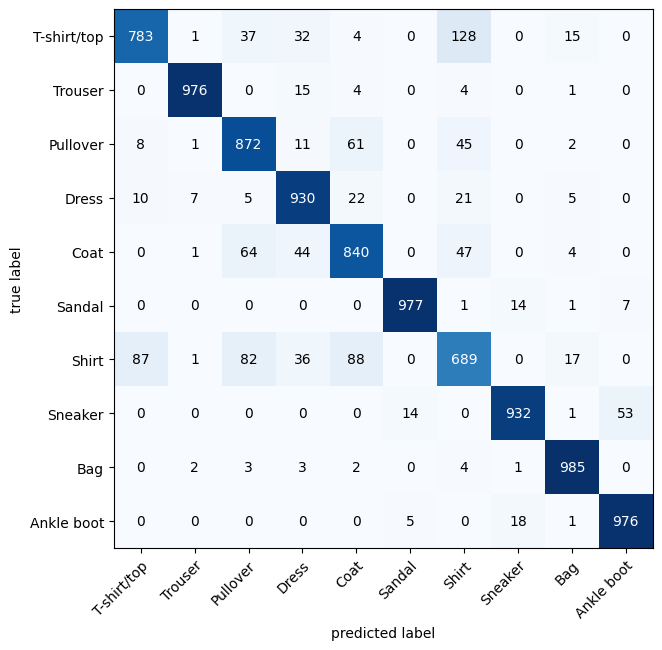

In [42]:
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), # Matplotlib likes working with numpy!
                                class_names=class_names,
                                figsize=(10,7))

# Saiving the model

In [43]:
from pathlib import Path

# Create the models path
MODELS_PATH = Path("models")
MODELS_PATH.mkdir(parents=True,
                  exist_ok=True)

# Create model save
MODEL_NAME = "torchvision_fashionMNIST_model.pth"
MODEL_SAVE_PATH = MODELS_PATH / MODEL_NAME

# Save the model
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/torchvision_fashionMNIST_model.pth


# Load the model

In [44]:
# Create a model instance
loaded_model = FashionMNISTModel(input_shape=1,
                                 hidden_units=10,
                                 output_shape=len(class_names))

In [45]:
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [47]:
loaded_model.to(device)

FashionMNISTModel(
  (conv_layer1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [48]:
model_results

{'Model Name': 'FashionMNISTModel',
 'Model Loss': 0.2993398606777191,
 'Model Accuracy': 89.60662939297124}

In [50]:
from torch.utils import data
loaded_model_results = eval_model(model=loaded_model,
                                  data_loader=test_data_loader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)

loaded_model_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model Name': 'FashionMNISTModel',
 'Model Loss': 0.2993398606777191,
 'Model Accuracy': 89.60662939297124}

In [56]:
model_results.keys()

dict_keys(['Model Name', 'Model Loss', 'Model Accuracy'])

In [59]:
# Check if the models' losses are close
torch.isclose(torch.tensor(model_results["Model Loss"]),
              torch.tensor(loaded_model_results["Model Loss"]),
              atol=1e-08) #Absolute Tolerence

tensor(True)